In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/water_potability.csv")

In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.shape

(3276, 10)

There are 3276 rows and 10 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


All columns has float value except Potability column which has integer values.

There are 3276 rows in total but in ph column there are 2785 non null values,
in Sulfate column there are 2495 non-null values, and in Trihalomethanes column there are 3114 non-null values.

In [ ]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Here, ph has 491 missing values, Sulfate has 781 missing values and Trihlomethanes has 162 missing values.

In [ ]:
df.isna().sum()/len(df)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

All of them are <70% so we donot drop any column yet.

<Axes: xlabel='Potability', ylabel='count'>

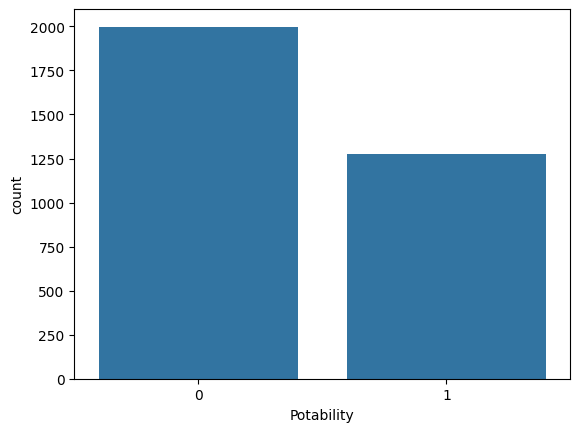

In [ ]:
sns.countplot(x="Potability", data = df)

There are many of them which are not potable than those which are potable. The data is imbalanced.

<Axes: >

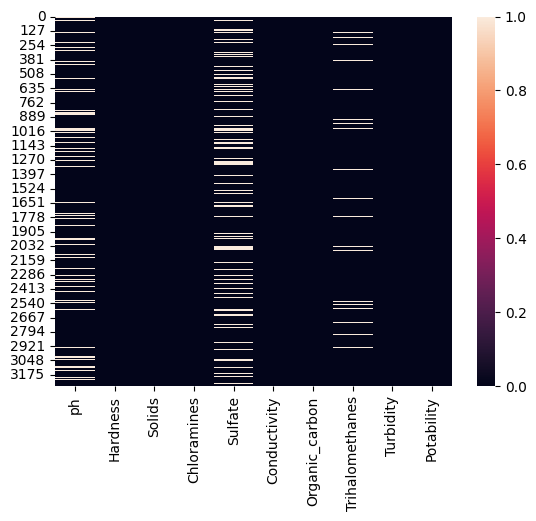

In [ ]:
sns.heatmap(df.isna())

In [ ]:
sns.boxplot(df["ph"])

<Axes: ylabel='ph'>

In [ ]:
sns.boxplot(df[["Sulfate", "Trihalomethanes"]])

<Axes: >

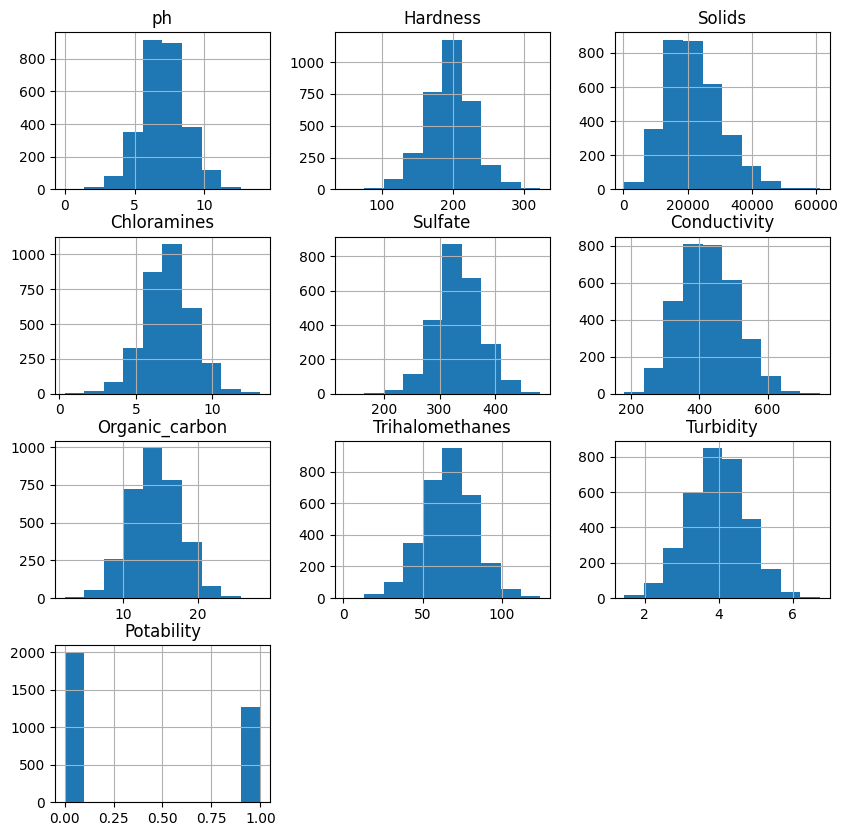

In [ ]:
df.hist(bins=10, figsize=(10,10))
plt.show()

In [ ]:
df.ph.median()

7.036752103833548

In [ ]:
df.Sulfate.median()

333.073545745888

In [ ]:
df.Trihalomethanes.median()

66.62248509808484

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].median())

In [ ]:
df['Sulfate'] = df['Sulfate'].fillna(df.Sulfate.median())

In [ ]:
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.Trihalomethanes.median())

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

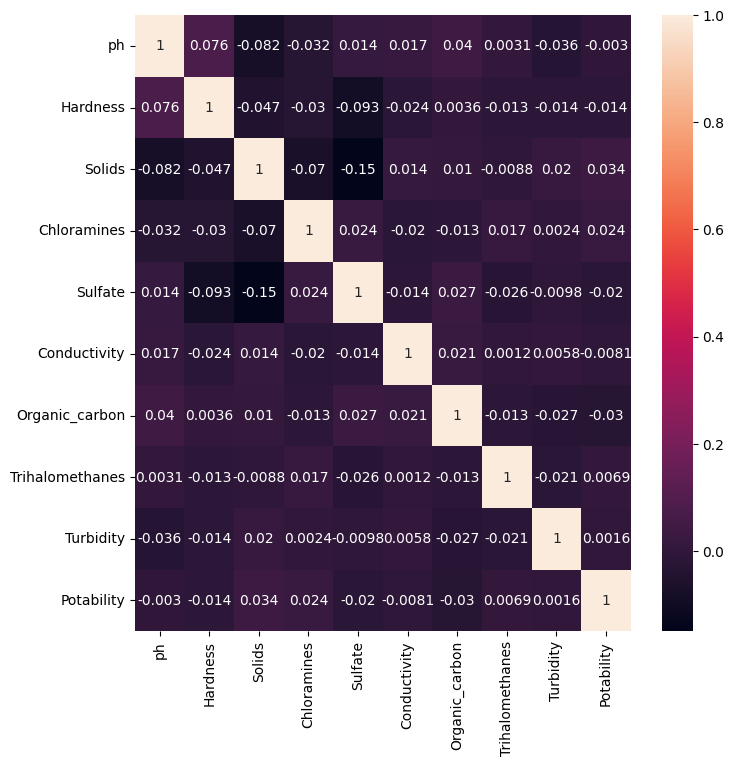

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True )

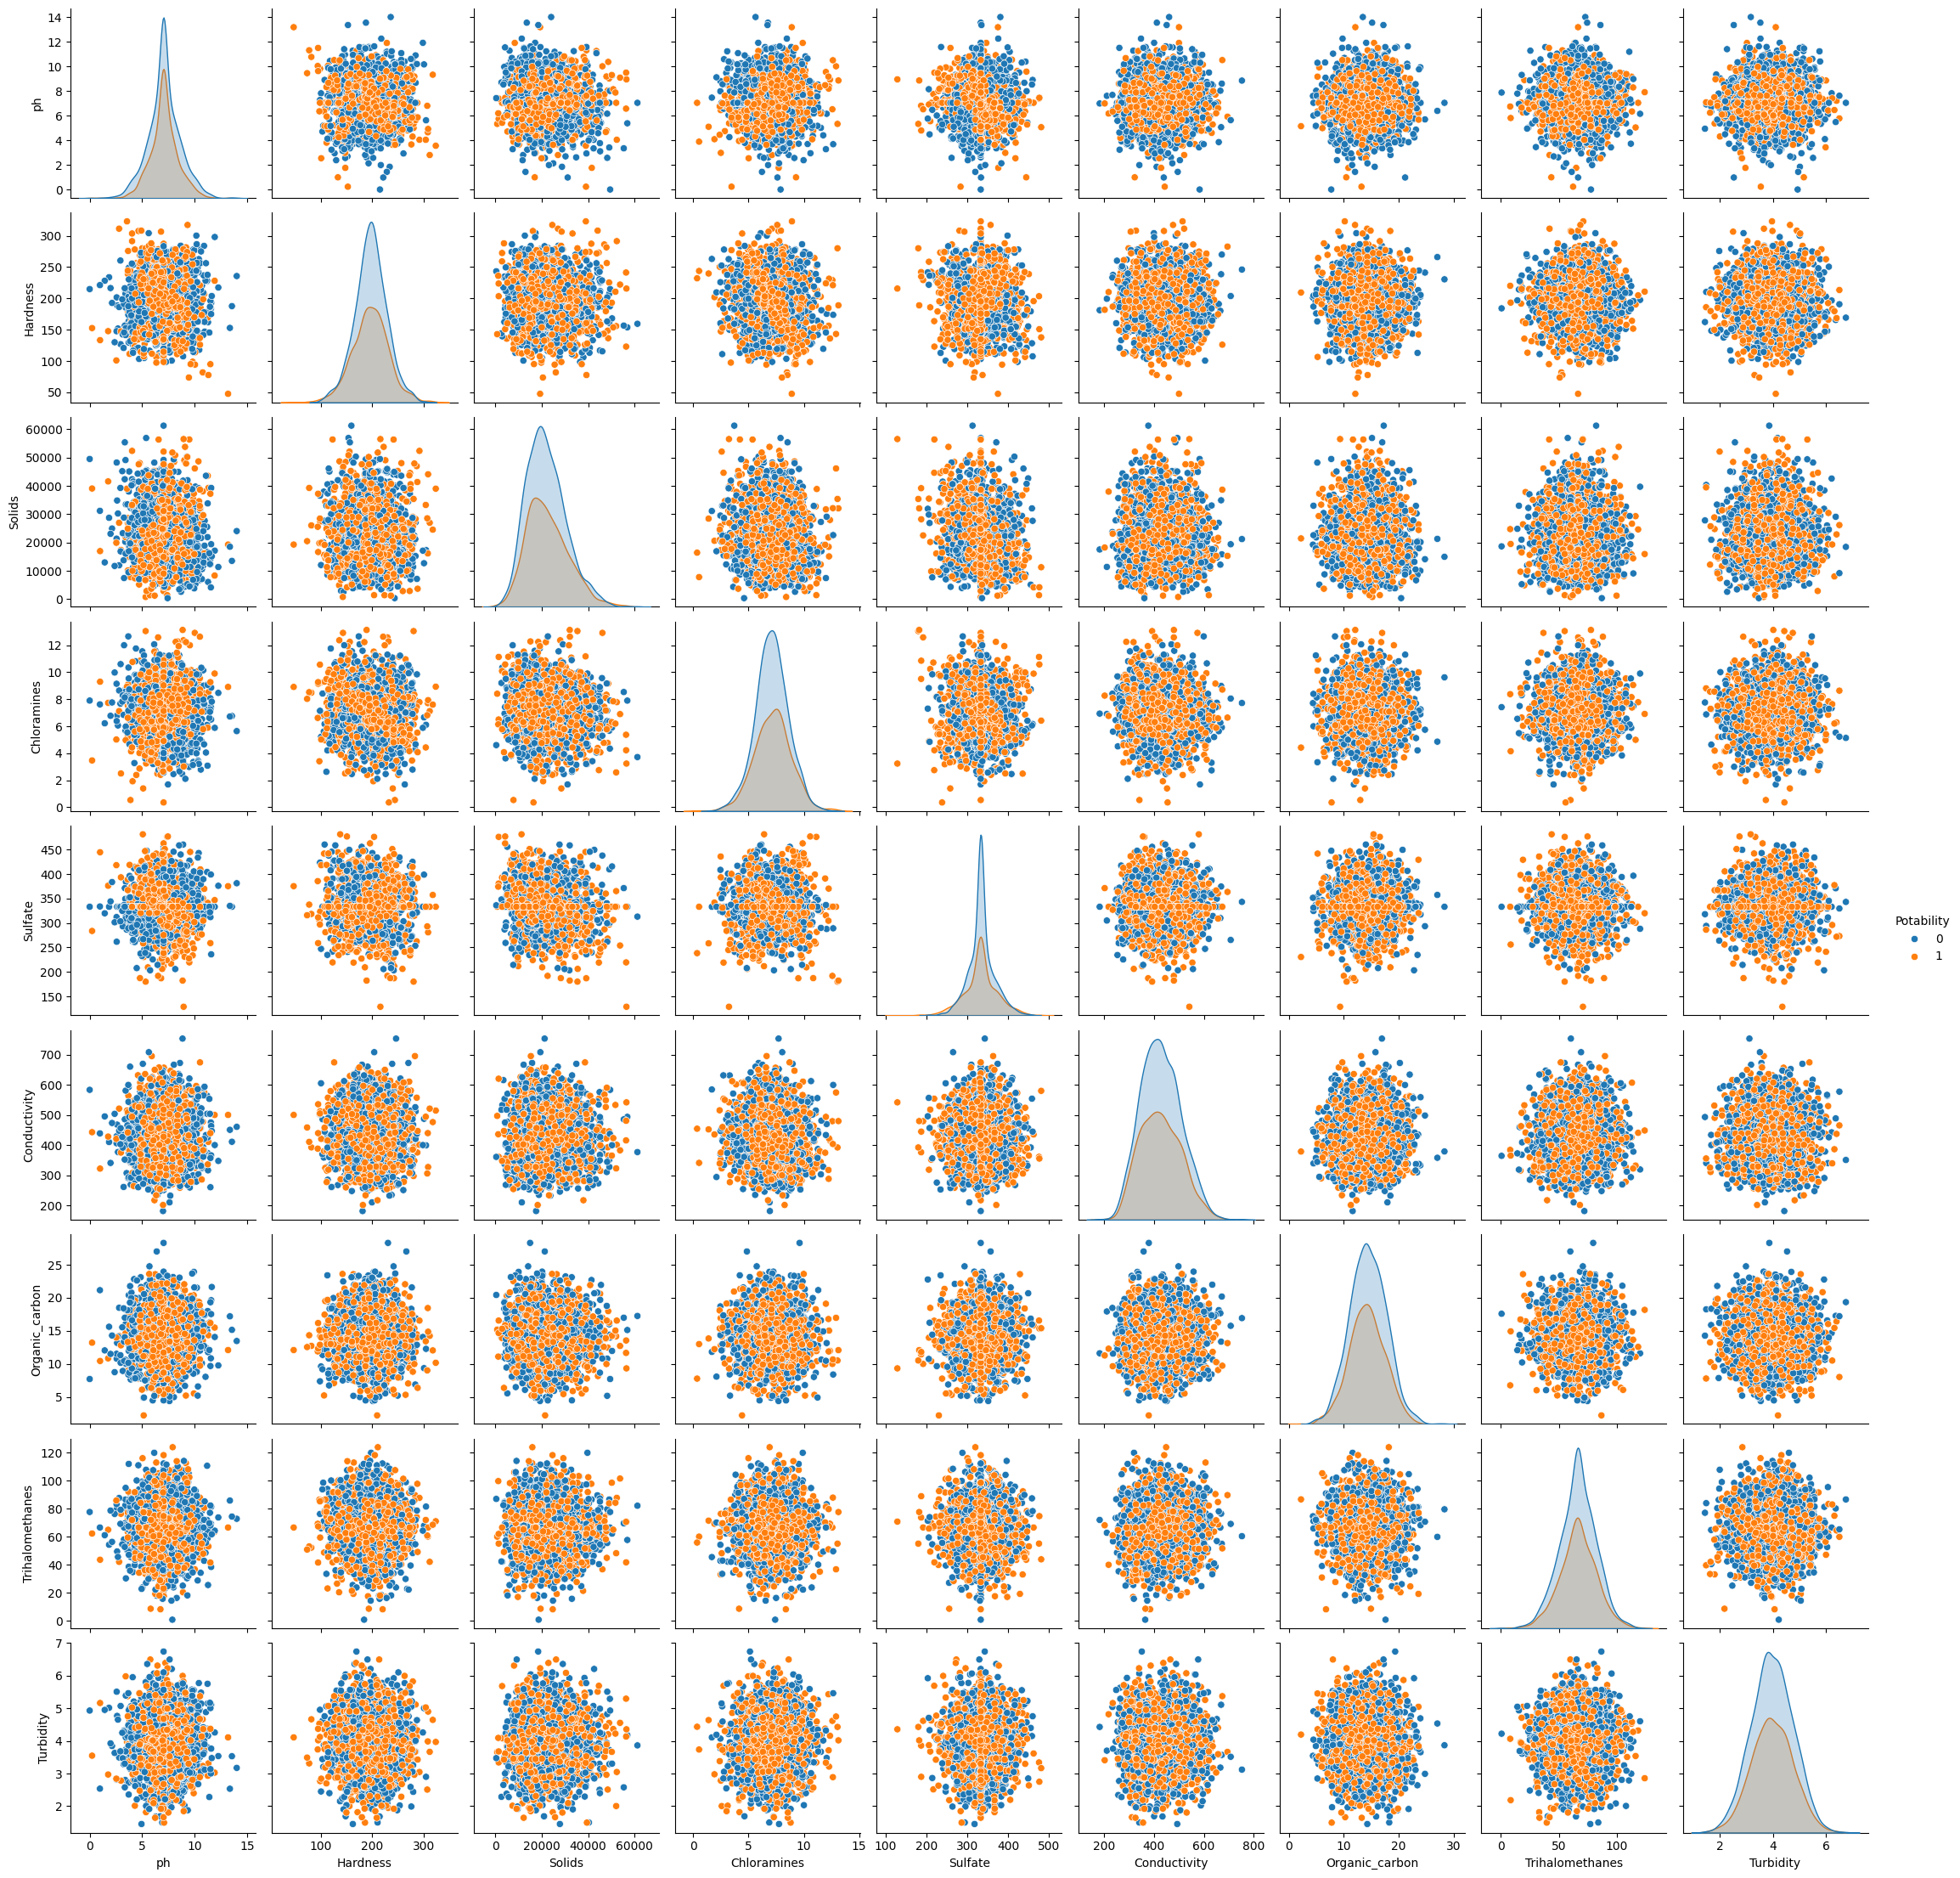

In [ ]:
sns.pairplot(df, hue="Potability")

<Axes: xlabel='Potability', ylabel='Turbidity'>

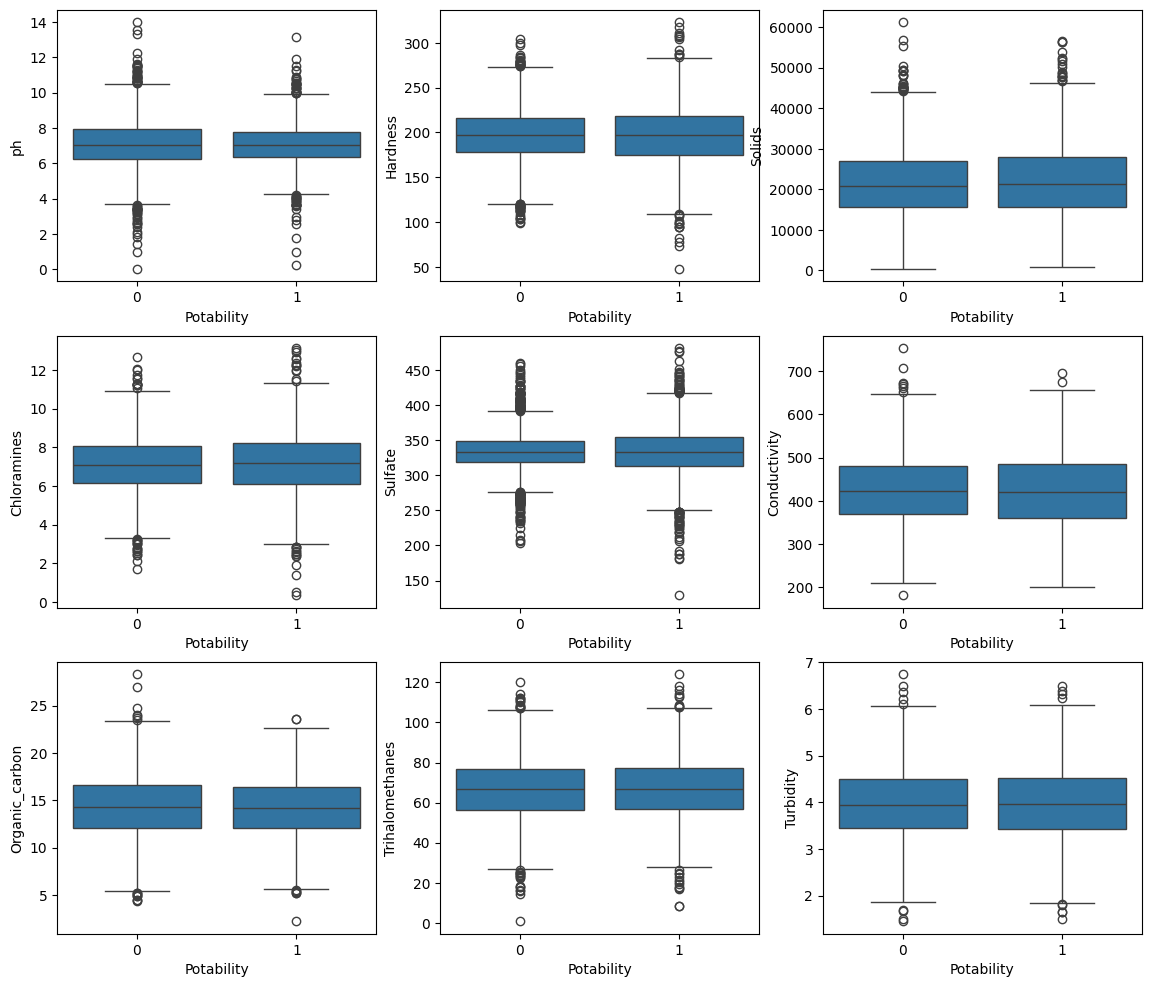

In [ ]:
plt.figure(figsize=(14,12))
plt.subplot(3,3,1)
sns.boxplot(x="Potability", y="ph", data=df)
plt.subplot(3,3,2)
sns.boxplot(x="Potability", y="Hardness", data=df)
plt.subplot(3,3,3)
sns.boxplot(x="Potability", y="Solids", data=df)
plt.subplot(3,3,4)
sns.boxplot(x="Potability", y="Chloramines", data=df)
plt.subplot(3,3,5)
sns.boxplot(x="Potability", y="Sulfate", data=df)
plt.subplot(3,3,6)
sns.boxplot(x="Potability", y="Conductivity", data=df)
plt.subplot(3,3,7)
sns.boxplot(x="Potability", y="Organic_carbon", data=df)
plt.subplot(3,3,8)
sns.boxplot(x="Potability", y="Trihalomethanes", data=df)
plt.subplot(3,3,9)
sns.boxplot(x="Potability", y="Turbidity", data=df)

<Axes: xlabel='Potability', ylabel='Sulfate'>

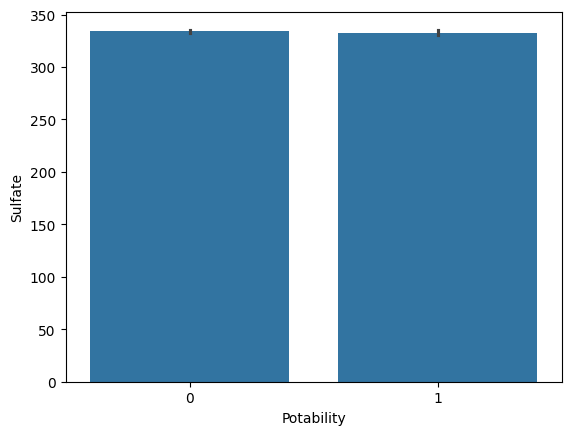

In [107]:
sns.barplot(x="Potability", y="Sulfate", data=df)

<Axes: xlabel='Hardness', ylabel='Count'>

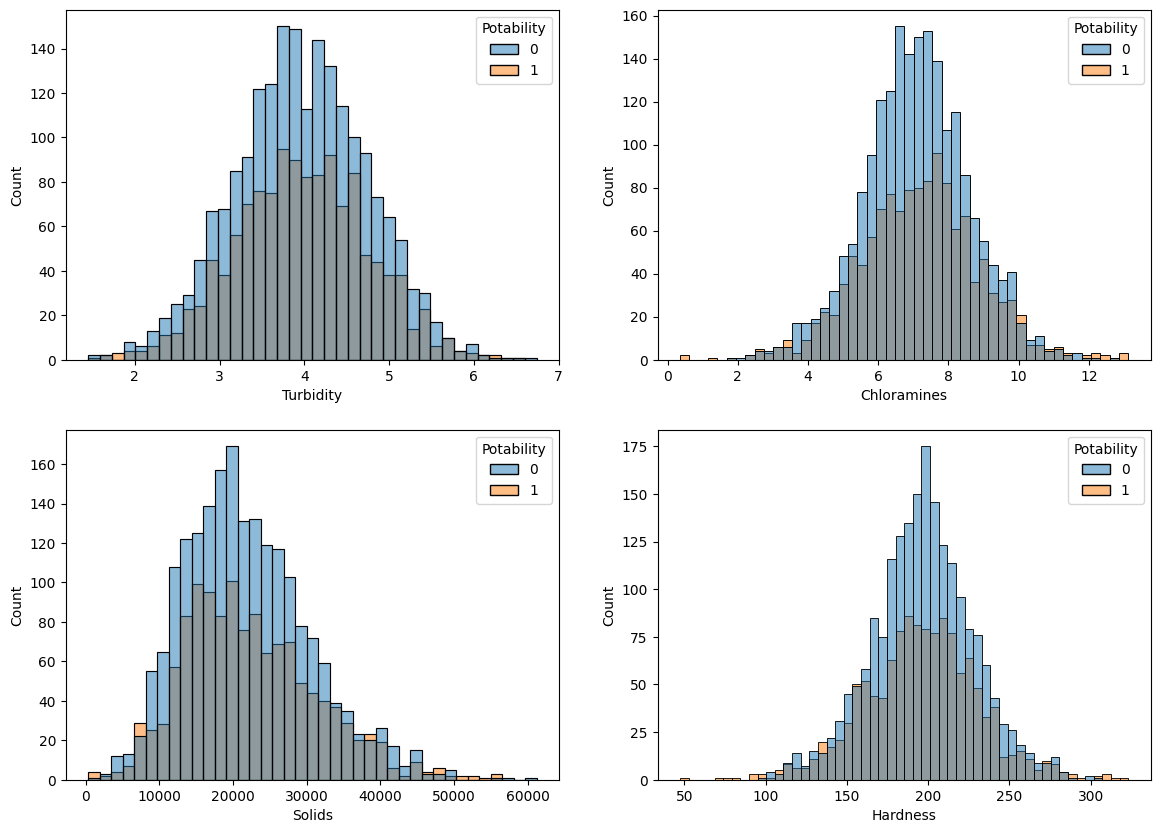

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.histplot(x="Turbidity", hue="Potability", data = df)
plt.subplot(2,2,2)
sns.histplot(x="Chloramines", hue="Potability", data = df)
plt.subplot(2,2,3)
sns.histplot(x="Solids", hue="Potability", data = df)
plt.subplot(2,2,4)
sns.histplot(x="Hardness", hue="Potability", data = df)

In [ ]:
X=df.iloc[:,:-1]
y= df["Potability"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# gives equal weight to all features and as all the features are independent all of them has some value in it
# also since the distribution is normal

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

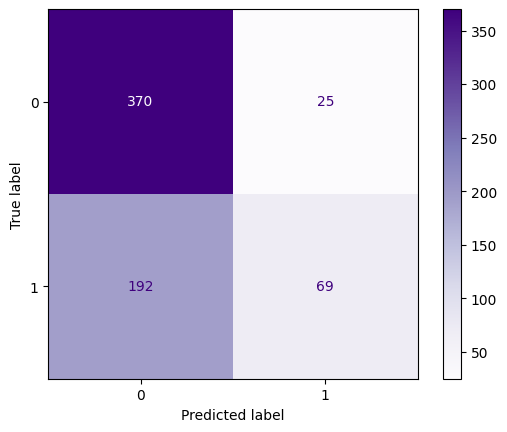

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score,  f1_score, classification_report, accuracy_score
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Purples")

In [ ]:
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("f1_score = ", f1_score(y_test, y_pred))

Precision =  0.7340425531914894
Recall =  0.26436781609195403
f1_score =  0.3887323943661972


In [ ]:
accuracy_score(y_test, y_pred)

0.6692073170731707

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X=df.iloc[:,:-1]
y= df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


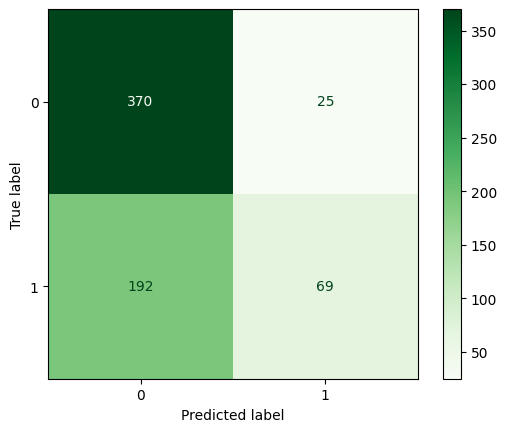

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score,  f1_score, classification_report, accuracy_score
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Greens")

In [101]:
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("f1_score = ", f1_score(y_test, y_pred))

Precision =  0.5185185185185185
Recall =  0.21455938697318008
f1_score =  0.3035230352303523


In [102]:
accuracy_score(y_test, y_pred)

0.6082317073170732

Hence, SVC is the best model in comparison to Naive Bayes as it has an accuracy score of 66.92%.


SVC
* Precision =  0.7340425531914894
* Recall =  0.26436781609195403
* f1_score =  0.3887323943661972

GaussianNB
* Precision =  0.5185185185185185
* Recall =  0.21455938697318008
* f1_score =  0.3035230352303523

When SVC predicts that the water is potable it is 73.4% correct while when GaussianNB predicts it is 51.58% correct.